<a href="https://colab.research.google.com/github/SistinaLove/2020_Fall_AI/blob/master/Assignment02_20174374(cnn_classification_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np

In [10]:
def build_model(width, height, channel):
    # 초기화
    model = Sequential()
    
    # 레이어에 대한 정보 = Conv2D~
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel)
        # 제일 처음에는 어떤 사이즈의 이미지 들어올 것인지 input shape넣어줘야 한다
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    # MaxPooling을 한 번 할 때마다 이미지 전체 사이즈가 반으로 줄어든다고 생각하면 된다
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    # 8*8중에 평균값 가져온다
    model.add(AveragePooling2D(
        pool_size=(8,8),
        padding='same'
    ))
    # 3차원 -> 1차원
    model.add(Flatten())
    # 길게 펼치기
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    # 마지막 결과가 10개로 나오게(units)
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    # Adam이 효율이 가장 좋다, loss값은 기본으로 출력, 여기에 accuracy를 하나 더 출력하겠다는 의미
    opt = Adam(learning_rate=0.001)
    model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model


In [11]:
# 데이터 전처리과정 - 현재는 설명 X
def data_preprocessing():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    mean=[0,0,0]
    std=[0,0,0]
    newX_train = np.ones(X_train.shape)
    newX_test = np.ones(X_test.shape)
    #train set에 있는 데이터로만 평균과 표준편차를 구함
    for i in range(3):
        mean[i] = np.mean(X_train[:,:,:,i])
        std[i] = np.std(X_train[:,:,:,i])

    #train과 test셋 모두 정규화 작업    
    for i in range(3):
        newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
        newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
        newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
        newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
            
    X_train = newX_train
    X_test = newX_test

    return (X_train, Y_train), (X_test, Y_test)


In [12]:
#(X_train, Y_train), (X_test, Y_test) = data_preprocessing()
# cifar10이라는 데이터 셋을 가져온다
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# 1번 인덱스 32 / 2번 인덱스 32 / 3번 인덱스 3
model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3] )

hist = model.fit(
    X_train, Y_train, 
    # batch_size = 1, 2, 4, 8, ... 보통은 64 많이 사용
    batch_size=64, epochs=40, 
    # verbose = 0 <= 한 줄 한 줄 결과 출력 X
    verbose=1, 
    # validation_split : 데이터 중, 어느 비율로 학습&테스트 할 지 정한다. ex) 0.1 => 50000 -> 45000 학습, 5000 테스트
    shuffle=True, validation_split=0.02
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/40
766/766 [==============================] - 6s 8ms/step - loss: 1.6220 - accuracy: 0.4050 - val_loss: 1.3562 - val_accuracy: 0.5180
Epoch 2/40
766/766 [==============================] - 5s 7ms/step - loss: 1.2146 - accuracy: 0.5622 - val_loss: 1.1250 - val_accuracy: 0.6090
Epoch 3/40
766/766 [==============================] - 5s 7ms/step - loss: 1.0618 - accuracy: 0.6239 - val_loss: 1.0243 - val_accuracy: 0.6320
Epoch 4/40
766/766 [==============================] - 5s 7ms/step - loss: 0.9608 - accuracy: 0.6607 - val_loss: 0.8917 - val_accuracy: 0.6850
Epoch 5/40
766/766 [==============================] - 5s 7ms/step - loss: 0.8788 - accuracy: 0.6877 - val_loss: 0.8900 - val_accuracy: 0.6850
Epoch 6/40
766/766 [==============================] - 5s 7ms/step - loss: 0.8185 - accuracy: 0.7115 - val_loss: 0.8227 - val_accuracy: 0.7310
Epoch 7/40
766/766 [==============================] - 5s 7ms/step - loss: 0.7673 - accuracy: 0.7276 - val_loss: 0.9206 - val_accuracy: 0.6910
Epoch 

[1.4067504405975342, 0.7184000015258789]

In [13]:
import matplotlib.pyplot as plt

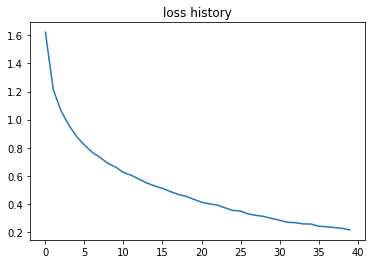

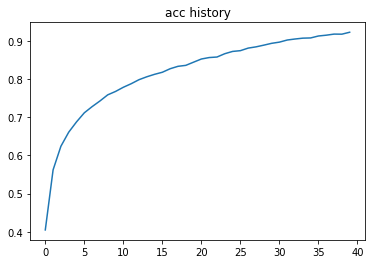

In [14]:
plt.plot(hist.history['loss']) # 얼마나 정답이랑 거리가 있는지(점차 낮아짐)
plt.title("loss history") 
plt.show()

plt.plot(hist.history['accuracy']) # 얼마나 정답이랑 가까운점(점차 올라감)
plt.title("acc history")
plt.show()